In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sp
import sympy as sym
from math import sqrt
from scipy.special import factorial
from sympy import integrate, init_printing
init_printing(use_latex="mathjax")
import sympy
from scipy.special import kv

# Problemas capítulo 2


**Problema 2.3**

This problem studies error propagation for specific examples. Specifically, at x = 2 find the: 

(a) absolute error in $f(x)=lnx$ for $\tilde{x}$ = 1.9, 

(b) relative error in $f(x) = \sqrt{2}$ for $\tilde{x}$ = 1.95, and 

(c) backward error for $f(x) = e^x$ and $\tilde{f}(2)= e^2 = 8$.

***Solución***

*Inciso (a)*

Sabemos que

$\Delta y \approx \frac{df(x)}{dx}\Delta x$

donde $\Delta x=\tilde{x}-x$, en este caso $\Delta x= 2-1.9=0.1$, y $\frac{df(x)}{dx}=\frac{1}{x}$, evaluando y sustituyendo:

$\Delta y \approx \frac{df(x)}{dx}\Delta x=\frac{0.1}{2}=0.05$

*Inciso (b)*

Sabemos que el error relativo es:

$\delta y=\frac{x}{f(x)}\frac{df(x)}{dx}\delta x$

donde $\delta x=\frac{\tilde{x}-x}{x}=\frac{1.95-2}{2}=-0.0125$, luego la derivada es $\frac{df(x)}{dx}=\frac{1}{2\sqrt{x}}$, finalmente sustituimos y evaluamos:

$\delta y=\frac{2}{\sqrt{2}}\frac{1}{2\sqrt{2}}(-0.025)=-0.0125$

*Inciso (c)*

Sea $y=f(x)=e^x$, y $\tilde{y}=\tilde{f}(x)=e^2=8$, entonces:

$\tilde{x}-x=ln8-2=0.0794$

**Problema 2.6**


Take the standard quadratic equation: $ax^2 + bx + c = 0$, whose solutions are:

$$x\pm = \frac{-b\pm \sqrt{b^2-4ac}}{2a} $$

Take $b > 0$ for concreteness. It is easy to see that when $b^2 \gg ac$ we don’t get a catastrophic cancellation when evaluating $b^2 − 4ac$ (we may still get a “benign” cancellation). Furthermore, $\sqrt{b^2 − 4ac }\approx b$. However, this means that $x_{+}$ will involve catastrophic cancellation in the numerator. We will employ an analytical trick in order to help us preserve significant figures. Observe that the product of the two roots obeys the relation: $x_{+} x_{−} = c/a$. The answer now presents itself: use Eq. (2.93) tocalculate $x_{−}$,for which no catastrophic cancellation takes place.Then,use $x_{+}x_{−} = c/a$ to calculate $x_{+}$. Notice that you ended up calculating $x_{+}$ via division only (i.e., without a catastrophic cancellation). Write a Python code that evaluates and prints out: (a) $x_{−}$, (b) $x_{+}$ using the “bad” formula, and (c) $x_{+}$ using the “good” formula. Take $a = 1, c = 1, b = 10^8$. Discuss the answers.

***Solución***

Escribimos un programa que calcula las raices para una ecuación cuadrática.

In [2]:
#Definimos las variables para resolver el ejercicio, en este caso primero escribimos las constantes para la ecuación a resolver
a=1
b=10e8
c=1
#Llamamos a xp la raíz positiva y xn la raiz negativa resolviendo primero en la forma tradicional
xp=(-b+np.sqrt(pow(b,2)-4*a*c))/(2*a)
xn=(-b-np.sqrt(pow(b,2)-4*a*c))/(2*a)
#Para encontrar a la raíz positiva se realiza con un simple despeje
x=c/(a*xn)
#Se imprime la ecuación que se resuleve junto con sus soluciones
print("La raiz negativa es: ",xn)
print("La raiz positiva usando la ecuación general es: ",xp)
print("La raiz positiva usando la otra formula es: ",x)

La raiz negativa es:  -1000000000.0
La raiz positiva usando la ecuación general es:  0.0
La raiz positiva usando la otra formula es:  -1e-09


**Problema 2.9**

This problem focuses on analytical manipulations introduced in order to avoid
a cancellation. Rewrite the following expressions in order to evaluate them for large x:

(a) $\sqrt{x+1}− \sqrt{x}$, (b) $\frac{1}{x+1}-\frac{2}{x}+\frac{1}{x−1}$, and (c) $\frac{1}{\sqrt{x}}-\frac{1}{\sqrt{x+1}}$.

***Solución***

*Inciso (a)*

$\sqrt{x+1}-\sqrt{x}=\left(\sqrt{x+1}-\sqrt{x}\right)\frac{\sqrt{x+1}+\sqrt{x}}{\sqrt{x+1}+\sqrt{x}}=\frac{x+1-x}{\sqrt{x+1}+\sqrt{x}}=\frac{1}{\sqrt{x+1}+\sqrt{x}}$

*Inciso (b)*

$\frac{1}{x+1}-\frac{2}{x}+\frac{1}{x+1}=\frac{x-1+x+1}{x^2-1}-\frac{2}{x}=\frac{2x}{x^2-1}-\frac{2}{x}=\frac{2x^2-2x^2+2}{(x^2-1)x}=\frac{2}{x(x^2-1)}$

*Inciso (c)*

$\frac{1}{\sqrt{x}}-\frac{1}{\sqrt{x+1}}=\frac{\sqrt{x+1}-\sqrt{x}}{\sqrt{x}\sqrt{x+1}}=\frac{\sqrt{x+1}-\sqrt{x}}{\sqrt{x}\sqrt{x+1}}\left(\frac{\sqrt{x+1}+\sqrt{x}}{\sqrt{x+1}+\sqrt{x}}\right)=\frac{x+1-x}{\sqrt{x}\sqrt{x+1}(\sqrt{x+1}+\sqrt{x}}=\frac{1}{\sqrt{x}\sqrt{x+1}(\sqrt{x+1}+\sqrt{x}}=\frac{1}{\sqrt{x}(x+1)+x\sqrt{x+1}}$


**Problema 2.12**

This problem studies the rational function introduced in the main text, Eq. (2.53).

(a) Apply Horner’s rule twice(once for the numerator and once for the denominator) to produce two plots, one for $x = 1.606 + 2^{−52}i$ and one for $x = 2.400 + 2^{−52}i$. Your results should look like Fig. 2.3.

(b) Create a new Python function that codes up the following expression:

$$s(x)=4-\frac{3(x-2)[(x-5)^2+4]}{x+(x-2)^2[(x-5)^2+3]}$$

which is a rewritten version of our rational function. Apply this new function for the previous two plots and compare the rounding error pattern, size, etc.

(c) Now introduce two more sets of results, this time for the starting expression for $r(x)$ produced using (not Horner’s rule but) the naive implementation, using powers (i.e., the way you would have coded this up before doing problem 2.11). Interpret your findings.


***Solución***

*Inciso (a)*

La ecuación (2.53) es:

$r(x)=\frac{4x^4-59x^3+324x^2-751x+622}{x^4-14x^3+72x^2-151x+112}$

Escribimos un programa para la regla de Horner, una función para el numerador y una para el denominador, y finalmente una para definir la división:

In [228]:
def Hornern(x):
    coef=[622,-751,324,-59,4]
    n=len(coef)
    poli=coef[n-1]
    polin=0
    for j in range (n-1,0,-1):
        polin=(poli)*x+coef[j-1]
        poli=polin
    return poli

def Hornerd(x):
    coef=[112,-151,72,-14,1]
    n=len(coef)
    poli=coef[n-1]
    polin=0
    for j in range (n-1,0,-1):
        polin=(poli)*x+coef[j-1]
        poli=polin
    return poli

def Horner(x):
    return Hornern(x)/Hornerd(x)

Se realizan las gráficas para el valor de $x=1.606+2^{-52}i$ y $x=2.400+2^{-52}i$ donde $i$ es el parámetro que va variando: 

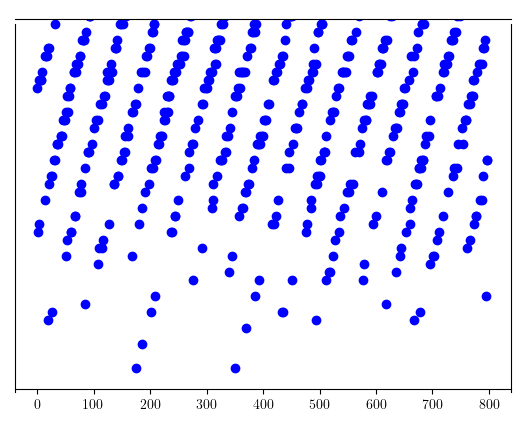

In [108]:
x=range(0,800)
plt.ylim(8.75237658077841,8.752376580778495)
plt.plot(x,[Horner(1.606+2**(-52)*i) for i in x],('bo'))
plt.show()
    


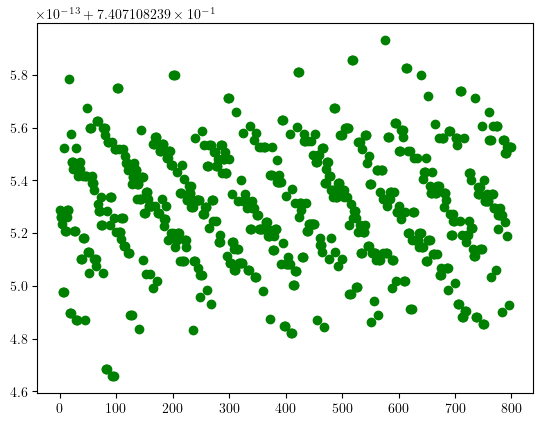

In [325]:
x=range(0,800)
#plt.ylim(0.7407108239095312,0.7407108239095295)
plt.plot(x,[Horner(2.4+2**(-52)*i) for i in x],('go'))
plt.show()

*Inciso (b)*


Definimos una función s(x) que evalua la división de una manera directa y se realizan las gráficas para los valores dados:

In [230]:
def s(x):
    s=4-(3*(x-2)*(pow(x-5,2)+4))/(x+pow(x-2,2)*(pow(x-5,2)+3))
    return s

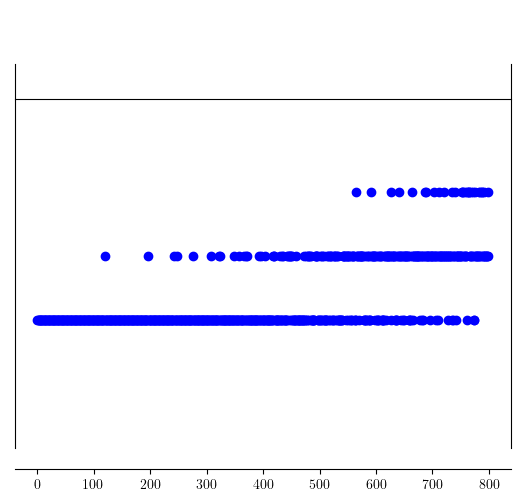

In [231]:
x=range(0,800)
plt.ylim(8.752376580778485,8.752376580778495)
plt.plot(x,[s(1.606+2**(-52)*i) for i in x],('bo'))
plt.show()
    

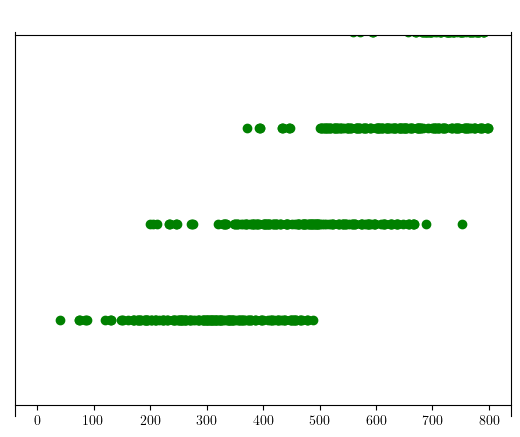

In [162]:
x=range(0,800)
plt.ylim(0.7407108239095312,0.7407108239095295)
plt.plot(x,[s(2.400+2**(-52)*i) for i in x],('go'))
plt.show()

*Inciso (c)*

Finalmente se define una función que evalua la función original de manera tradicional y se realizan las gráficas:

In [198]:
def p(x):
    return (4*x**(4)-59*x**(3)+324*x**(2)-751*x+622)/(x**(4)-14*x**(3)+72*x**(2)-151*x+112)

print(p(2.400+2**(-52)))
print(p(2.400+2**(-52)*800))

0.7407108239094923
0.7407108239095762


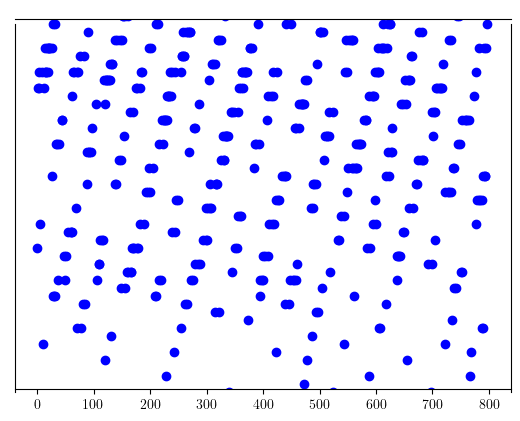

In [214]:
x=range(0,800)
plt.ylim(8.75237658077841,8.752376580778495)
plt.plot(x,[p(1.606+2**(-52)*i) for i in x],('bo'))
plt.show()

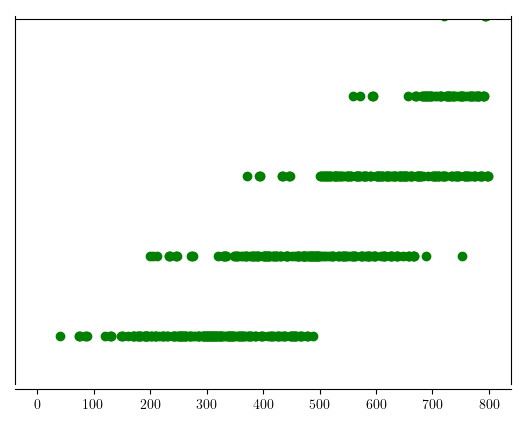

In [328]:
x=range(0,800)
plt.ylim(0.740710823909531,0.740710823909529)
plt.plot(x,[s(2.400+2**(-52)*i) for i in x],('go'))
plt.show()

*Conclusiones*

Podemos ver que en los primeros dos métodos se observan patrones al evaluar ambos puntos,  mientras que en el último método, al evaluar el primer número no se observa un patrón claro, pero al evaluar el segundo término se observa el mismo patrón que con el segundo método.

**Problema 2.15**

Here we study the Basel problem, namely the sum of the reciprocals of the squares of the positive integers. This also happens to be a specific value of the Riemann zeta function, $\zeta(2)$. The value can be calculated in a variety of ways and turns out to be:
$$\sum_{k=0}^{\infty} \frac{1}{k^2}=\frac{\pi^2}{6}=1.6449340668482264...$$
Here we will use Python to compute partial sums.

(a) Code this up by adding all the contributions from $k = 1, 2, $ up to some large integer; break out of the loop when the value of the sum stops changing. What is the value of the sum when this happens? Is there some meaning behind the value of the maximum integer (inverse squared) when this happens? Call this $nmaxd$.

(b) We were summing the contributions from largest to smallest, so by the time we got to the really tiny contributions they stopped mattering. The obvious fix here is to reverse the order in which we are carrying out the sum. This has the advan- tage of dealing with the tiniest contributions first (you may have encountered the term “subnormal numbers” in appendix B). The disadvantage is that our previous strategy regarding termination (break out when the sum stops changing) doesn’t apply here: when summing in reverse the last few contributions are the largest in magnitude. Instead, simply pick a large maximum integer $nmaxr$ from the start. Be warned that this will start to take a long time, depending on the CPU you are using. Do a few runs for nmaxr a multiple of $nmaxd (4, 8, 16, 32)$. You should see the answer get (slowly) better. The beauty here is that the larger nmaxr, the better we can do. (Try increasing nmaxd for the direct method.)

(c) Employ compensated summation to carry out the sum. The Kahan sum function does well, despite the fact that it carries out the sum in direct order, i.e., by starting from the largest contribution. We don’t have a nifty termination criterion, but increasing the number of terms can still make a difference.

***Solución***

*Inciso (a)*

Se escribe un código usango un ciclo for para la función de Basel

In [331]:
#Hacemos un ciclo for para la función de Basel
def Basel(n):
    b=0
    for i in range (1,n+1,1):
        b=b+1/i**2
        
    return b
nmaxd=95000000
print(Basel(nmaxd))

1.644934057834575


*Insciso (b)*

Se invierte el ciclo for para que la suma se realice de reversa

In [330]:
#Hacemos una función Basel que sume de reversa
def Baselr(x):
    br=0
    for i in range (x,0,-1):
        br=br+1/i**2
    return br
nmaxr=4*nmaxd
print (Baselr(nmaxr))


1.6449340642166475


*Inciso (c)*

Para el método de la suma de Kahan se realizan dos funciones y la función final resta las dos primeras

In [335]:
def kahan(x):
    suma= 0.0
    c = 0.0
    for f in range(1,x+1,1):
        suma=suma+1/f**2
        y = f - c
        t = suma + y
        c = (t - suma) - y
        suma= t
 
    return suma
def s(n):
    b=0
    for i in range (1,n+1,1):
        b=b+i
        
    return b

        
 

In [337]:
def sumak(x):
    return kahan(x)-s(x)
print (Basel(nmaxd))
print (Baselr(nmaxr))
print (sumak(nmaxd))
print (sumak(nmaxr))

1.644934057834575
1.6449340642166475
2.0
0.0


Vemos que el método más efectivo es la función Baselr, ya que tiene una mayor precisión y por lo mismo funciona para números más grandes que cuando la suma se realiza de manera tradicional

**Problema 18**

We will study the Fourier series of a periodic square wave.As you may already know, this gives rise to what is known as the Gibbs phenomenon, which is a “ringing” effect that appears at discontinuities. Specifically, from $\pi$ to $\pi$ we have:
$$f(x)=\begin{cases}
\frac{1}{2}& \text{ , }  0<x<\pi  \\ 
 -\frac{1}{2}& \text{ , } -\pi<x<0 
\end{cases}$$
The Fourier series of this functiom is:
$$f(x)=\frac{2}{\pi}\sum_{n=1,3,5,...}\frac{sin(nx)}{n}$$
(a) Create two Python functions, one for the square wave and another for its Fourier expansion. The latter should take in as an argument the maximum $n$ up to which you wish the sum to go.

(b) Plot the square wave and the Fourier-expansion results for $n_{max}=1,3,5,7,9$ (six curves in total). Where are the oscillation amplitudes largest?

(c) Note that this arises not from roundoff error, but from the nature of the Fourier series itself. To convince yourself that this is, indeed, the case, take the maximum $n$ value to be 21, 51, 101, and so on. What do you find?

**Solución**

*Inciso (a)*

Primero definimos nuestra función en Python:

In [25]:
#Declaramos nuestras variables
n=sym.Symbol("n")
x=sym.Symbol("x")


In [31]:
#Definimos la función dada
#Definimos los valores minimos y maximos 
Xmin=-1/2
Xmax=1/2
#Definimos el periodo y frecuencia
X=Xmax-Xmin
w=2*np.pi/X
#Para definir la función completa definimos dos funciones:
f1=1/2
f2=-1/2
fx = sym. Piecewise((f1, ((x<np.pi) & (x>0))), (f2, ((-np.pi<x) & (x<0))))
fx

Piecewise((0.5, (x < 3.14159265358979) & (x > 0)), (-0.5, (x > -3.14159265358979) & (x < 0)))

Ahora necesitamos calcular los coeficientes de Fourier, sabemos que la serie de Fourier para una función es:

$$f(t)=\frac{a_0}{2}+\sum_{n=1}^{n=\infty}a_n cos(nwt)+\sum_{n=1}^{n=\infty}b_n sin(nwt)$$

donde los coeficientes se definen de la siguiente manera:

$$a_0=\frac{2}{T}\int_Tf(t)dt \text{ , } a_n=\frac{2}{T}\int_Tf(t)cos(nwt)dt \text{ , } b_n=\frac{2}{T}\int_Tf(t)sin(nwt)dt$$

In [50]:
#Calculamos los coeficientes

#Para a0

f_int=fx
a0 = (2/X)*sym.integrate(f_int, (x, Xmin, Xmax))
print ("a0 = ")
sym. pprint(a0)

#Para an
f_int= fx*sym.cos(n*w*x)
an = (2/X)*sym. integrate(f_int, (x, Xmin, Xmax))
an = sym. simplify(an)
print("an = ")
sym. pprint(an)
# Calculamos la integral para bn
f_int= fx*sym.sin(n*w*x)
bn = (2/X)*sym.integrate(f_int, (x, Xmin, Xmax))
bn = sym. simplify(bn)
print("bn = ")
sym.pprint(bn)

a0 = 
0
an = 
0
bn = 
0.127323954473516


Ahora hacemos la expansión en serie, comprobamos que $a_0$ y $a_n$ son cero y solo tenemos terminos con el seno:

In [66]:
#Hacemos la expansión
#Empezamos la serie en 0
def exp(n):
    serie=0
    #Definimos cuántos armónicos se usarán
    #La función que hará la expansión la definimos con un ciclo for
    for i in range (1,n+1):
        #an_c=an.subs(n,i) #la dejamos comentada porquqe en este caso an es 0
        bn_c=bn.subs(n,i)
    
        #if abs(an_c)<0.0001: an_c=0
        if abs(bn_c)<0.0001: bn_c=0
    
        #serie=serie+an_c*sym.cos(i*w*x) #en este caso este término siembre vale 0
        serie=serie+bn_c*sym.sin(i*w*x)
    
    serie=a0/2+serie
    
    return serie

print("f(x)=")
sym.pprint(exp(n))

f(x)=
0.127323954473516⋅sin(6.28318530717959⋅x)


*Inciso (b)*

Graficamos para n=1,3,5,7,9

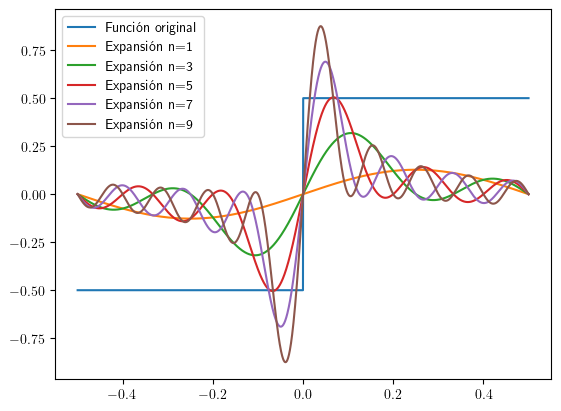

In [71]:
fs1=sym.lambdify(x,exp(1))
fs3=sym.lambdify(x,exp(3))
fs5=sym.lambdify(x,exp(5))
fs7=sym.lambdify(x,exp(7))
fs9=sym.lambdify(x,exp(9))

f=sym.lambdify(x,fx)
v_x=np.linspace(Xmin,Xmax,2000)
#Evaluamos las funciones
fsG1=fs1(v_x)
fsG3=fs3(v_x)
fsG5=fs5(v_x)
fsG7=fs7(v_x)
fsG9=fs9(v_x)
fG=f(v_x)

plt.plot(v_x,fG,label="Función original")
plt.plot(v_x,fsG1,label="Expansión n=1")
plt.plot(v_x,fsG3,label="Expansión n=3")
plt.plot(v_x,fsG5,label="Expansión n=5")
plt.plot(v_x,fsG7,label="Expansión n=7")
plt.plot(v_x,fsG9,label="Expansión n=9")

plt.legend()
plt.show()

La amplitud es máxima para n=9.

*Inciso (c)*



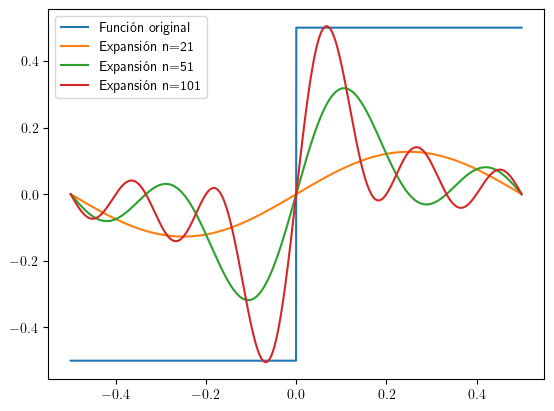

In [72]:
fs21=sym.lambdify(x,exp(21))
fs51=sym.lambdify(x,exp(51))
fs101=sym.lambdify(x,exp(101))


f=sym.lambdify(x,fx)
v_x=np.linspace(Xmin,Xmax,2000)
#Evaluamos las funciones
fsG21=fs1(v_x)
fsG51=fs3(v_x)
fsG101=fs5(v_x)
fG=f(v_x)

plt.plot(v_x,fG,label="Función original")
plt.plot(v_x,fsG21,label="Expansión n=21")
plt.plot(v_x,fsG51,label="Expansión n=51")
plt.plot(v_x,fsG101,label="Expansión n=101")

plt.legend()
plt.show()

Como se espera, con cualquier expansión mientras más términos se toman, el resultado se parece más a la función original.

***Problema 2.21***

This problem studies the evaluation of Bernoulli numbers and polynomials.


(a) In section 2.5.2.2 we saw how to go from a generating function to a recurrence relation for Legendre polynomials. We will now do something analogous for Bernoulli numbers. Start from the first equation and show the second:

$$\frac{u}{e^u-1}=\sum_{j=0}^{\infty}\frac{B_ju^j}{j!} \text{ , } n-1=\sum_{j=1}^{n-1}B_{2j}\binom{2n}{2j}$$

You should use the Taylor series of the exponential and the Cauchy product.

(b) Compute the first 15 even Bernoulli numbers from the recurrence relation.

(c) Slightly generalizing the above generating function, we get to a corresponding
relation for Bernoulli polynomials:

$$\frac{ue^{ut}}{e^u-1}=\sum_{j=0}^{\infty}\frac{B_j(t)u^j}{j!}$$

Use this equation to derive the following properties:

$$B_j(0)=B_j \text{ , } \frac{d}{dt}B_j(t)=jB_{j-1}(t) \text{ , } B_j(1)=(-1)^jB_j(0)$$

(d) We will now use the previous three properties to derive the celebrated \textit{Euler-Maclarin summation formula}. Since $B_0(t)=B_0=1$, we can write:

$$\int_0^1 g(t)dt=\int_0^1 g(t)B_o(t)dt$$

You can now use the second property and replace $B_0(t)$ with $B′_1(t)$. Integrate by parts and keep repeating the entire exercise until you find:

$$\int_0^1 g(t)d=\frac{g(0)}{2}+\frac{g(1)}{2}-\sum_{j=1}^m\frac{1}{(2j)!}B_{2j}\left[g^{2j-1}(1)-g^{2j-1}(0)\right]+\frac{1}{(2m)!}\int_0^1g^{2m}(t)B_{2m}(t)dt$$

(e) To make the integral and derivatives easier, take $g(t) = e^t$. Print out the value of the left-hand side in Eq. (2.121) as well as the value of the right-hand side as you take $m = 1, 2, 3, . . . , 10$ (always dropping the remainder term).

*Solución*


***Inciso (a)***

Partimos de la función generatriz que nos dan:

$$\frac{u}{e^u-1}=\sum_{j=0}^{\infty}\frac{B_ju^j}{j!}$$

Podemos reescribir como:

$$u=(e^u-1)\sum_{j=0}^{\infty}\frac{B_ju^j}{j!}$$

Hacemos la expansión de $(e^u-1)$ como serie de Taylor:

$$u=\left(u+\frac{u^2}{2!}+\frac{u^3}{3!}+...\right)\sum_{j=0}^{\infty}\frac{B_ju^j}{j!}$$

$$u=\sum_{i=1}^{\infty}\frac{u^i}{i!}\sum_{j=0}^{\infty}\frac{B_ju^j}{j!}$$

Usando el producto de Cauchy que dice:

$$\left(\sum_{k=0}^{\infty}a_k\right)\left(\sum_{m=0}^{\infty}b_m\right)=\left(sum_{n=0}^{\infty}c_n\right)$$

donde $c_n=a_0b_n+a_1b_{n-1}+...+a_nb_0=\sum_{k=0}^na_kb_{n-k}$

Para nuestro caso tenemos:

\begin{equation} \label{eq1}
\begin{split}
U & = \sum_{n=0}^{\infty}\sum_{k=0}^n \frac{u^{n+1-k}}{(n+1-k)!}\frac{B_k u^k}{k!}\\
 & = \sum_{n=0}^{\infty}\sum_{k=0}^n \frac{B_ku^{n+1}}{(n+1-k)!k!} \\
 & = \sum_{n=0}^{\infty}\sum_{k=0}^n \frac{(n+1)!B_ku^{n+1}}{(n+1-k)!k!(n+1)!}
\end{split}
\end{equation}

Usando la notación:

$$\binom{n}{x}=\frac{n!}{(n-k)!k!}$$

Podemos escribir:

$$u=\sum_{n=0}^{\infty}\sum_{k=0}^n \binom{n+1}{k}\frac{B_ku^{n+1}}{(n+1)!}$$

cambiamos n+1 a n:

$$u=\sum_{n=0}^{\infty}\sum_{k=0}^n \binom{n}{k}\frac{B_ku^{n}}{(n)!}$$

como los indices son mudos cambiamos k=j:

$$u=\sum_{n=0}^{\infty}\sum_{j=0}^n \binom{n}{j}\frac{B_ku^{n}}{(n)!}$$

Ya que del lado derecho solo tenemos a u, podemos concluir que:

$$ B_0=1 \text{   y   } \sum_{j=0}^{n-1}\binom{n}{j}B_j=0$$


***Inciso (b)***
Escribimos el programa para encontrar los números de Bernoulli:

In [5]:
from math import comb
from fractions import Fraction

def bernoulli(n):
    if n==0: #Sabemos que B_0=1
        return 1
    if n==1: #Cuando n=1 es el único caso en que cuando n es impar es distinto de 0
        return -0.5
    
    suma=Fraction(0)
    if n%2: #Cuando n es impar el número de Bernoulli es 0
        return 0
    
    for k in range (n):
        suma += bernoulli(k)*comb(n,k)/(n+1-k)
        
    return -suma

bernoulli(20)

-529.1242423296121

***Inciso (c)***

Queremos demostrar que para t=0 se cumple que $B_j(0)=B_j$

Evaluando vemos que:

$$\frac{u}{e^u-1}=\sum_{j=0}^{\infty}B_j(0)\frac{u^j}{j!}$$

pero anteriormente vimos que:

$$\frac{u}{e^u-1}=\sum_{j=0}^{\infty}B_j\frac{u^j}{j!}$$

comparando ambas sumas podemos concluir que:

$$B_j(0)=B_j$$

Para la segunda ecuación:


Para la tercera ecuación:

Sabemos que la fórmula de recurrencia para los polinomios de Bernoulli es:

$$B_j(t)=\sum_{j=0}^{n}(-1)^j\binom{n}{j}B_j t^{n-j}$$

evaluando para t=1 se tiene

$$B_j(1)=\sum_{j=0}^n(-1)^j\binom{n}{j}B_j 1^{n-j}$$

sea n=j y como $B_j=B_j(0)$$:

$$B_j(1)=\sum_{j=0}^j(-1)^j\binom{j}{j}B_j(0)$$

simplificando términos:

$$B_j(1)=(-1)^jB_j(0)$$

***Inciso (d)***

Usando las propiedades del inciso anterior, como $B_1´(t)=B_0(t)$ se tiene la integral:

$$\int_0^1 g(t)B_1'(t)dt$$

realizamos integración por partes: $u=g(t) \rightarrow du=g'(t)$ y $dv=B_1'(t)dt \rightarrow v=B_1(t)$, entonces:

$$\int_0^1 g(t)B_1'(t)dt=g(t)B_1(t)|_0^1 - \int_0^1 g'(t)B_1(t)dt$$

evaluando y utilizando nuevamente la propiedad de la derivada:

$$\int_0^1 g(t)B_1'(t)dt=\frac{g(0)}{2}+\frac{g(1)}{2} - \int_0^1 g'(t)B_2'(t)dt$$

integramos nuevamente por partes: $u=g'(t) \rightarrow du=g''(t)dt$ y $dv=B_2'(t) \rightarrow v=B_2(t)$, entonces:

$$\int_0^1 g'(t)B_2'(t)dt=g'(1)B_2(1)-g'(0)B_2(0)-\int_0^1 g''(t)B_2(t)dt$$

nuevamente usamos la propiedad de las derivadas:

$$\int_0^1 g''(t)B_2(t)dt=\int_0^1 g'(t)B_3'(t)dt$$

integramos por partes: $u=g''(t) \rightarrow du=g^3(t)$ y $dv=B_3'(t) \rightarrow v=B_3(t)$

$$\int_0^1 g'(t)B_3'(t)dt=g^3(t)B_3(t)|_0^1-\int_0^1 g^3(t)B_3(t)dt$$

pero $B_3(1)=(-1)^3B_3(0)=-1*B_3=0$ y $B_3(0)=B_3=0$ por lo tanto el primer término es 0 y sólo tenemos la integral en el caso de n impar:

$$\int_0^1 g^3(t)B_3(t)dt=\int_0^1 g^3(t)B_4'(t)dt$$

integrando por partes: $u=g^3(t) \rightarrow du=g^4(t)dt$ y $dv=B_4'(t) \rightarrow v=B_4(t)$, por lo tanto:

$$\int_0^1 g^3(t)B_4'(t)dt=g^3(t)B_4(t)|_0^1-\int_0^1B_4(t)g^4(t)dt$$

Sumando todos los resultados obtenidos:

$$\int_0^1g(t)dt=\frac{g(0)}{2}+\frac{g(1)}{2}-(g'(1)B_2(1)-g'(0)B_2(0))-(g^3(1)B_4(1)-g^3(0)B_4(0))+\int_0^1B_4(t)g^4(t)dt$$

vemos que nos queda la función $g(t)$ por los polinomios de Bernoulli que se terminan reduciendo a solo los numeros de Bernoulli por el intervalo de evaluación y las integrales cuando los coeficientes son impares no aparecen, podemos ver que se cumple la relación dada.

***Inciso (e)***

Primero realizamos la integral directa cuando $g(t)=e^t$

$$\int_0^1e^tdt=e-1$$

In [14]:
#Definimos las funciones para el lado derecho de la ecuación dada
x=sym.Symbol("x")

def polb(p):
    polb=0
    for m in range (0,p+1,1):
        polb+=(bernoulli(m)*comb(p,m)*x**(p-m))
    return polb

def berg(j):
    s=0
    for j in range (1,j+1,1):
        s=s+(1/factorial(2*j)*bernoulli(2*j)*(np.exp(1)-np.exp(0)))
    return s

def inte(m):
    inte=1/factorial(2*m)*sympy.integrate(sympy.exp(x)*polb(2*m), (x, 0, 1))
    return inte

def res(m):
    res= np.exp(0)/2+np.exp(1)/2-berg(m)+inte(m)
    return res

[res(i) for i in range (1,10,1)]

[0.132617428524602 + 0.583333333333333⋅ℯ, 0.136392819953018 + 0.58194444444444
4⋅ℯ, 0.136302929680912 + 0.581977513227513⋅ℯ, 0.136305176937715 + 0.5819766865
07937⋅ℯ, 0.136305120188806 + 0.581976707384694⋅ℯ, 0.136305121625197 + 0.581976
706856275⋅ℯ, 0.13630512158882 + 0.581976706869657⋅ℯ, 0.136305121589742 + 0.581
976706869318⋅ℯ, 0.136305121589719 + 0.581976706869326⋅ℯ]

**Problem 2.24**

For the 36-charge array of section 2.5 determine, as a function of position along the y axis, the minimum number of terms you need to keep in the multipole expansion in order to ensure your relative error in the total potential is less than 10−6.

*Solución*

Primero corremos todos los programas que utilizan en el proyecto del arreglo de 36 cargas:

In [19]:
def kahansum(xs):
    s = 0.; e = 0.
    for x in xs:
        temp = s
        y=x+e
        s = temp + y
        e = (temp - s) + y
    return s


xs = [0.7, 0.1, 0.3]
print(sum(xs), kahansum(xs))

1.0999999999999999 1.1


In [32]:
def chargearray(nvals):
    vals = [-0.5 + i/(nvals-1) for i in range(nvals)] 
    qtopos = {}
    for i,posx in enumerate(vals):
        for j,posy in enumerate(vals): 
            count = j + nvals*i + 1
            key = 1.02*count if (i+j)%2==0 else -count
            qtopos[key] = posx, posy
    return qtopos


def vecmag(rs):
    sq = [r**2 for r in rs]
    return sqrt(kahansum(sq))


def fullpot(qtopos,rs):
    potvals = []
    for q,pos in qtopos.items():
        diffs = [r - po for r,po in zip(rs,pos)] 
        R = vecmag(diffs)
        potvals.append(q/R)
    return kahansum(potvals)



qtopos = chargearray(6) 
for y in 1,-1:
    rs = [0.,y]
    potval = fullpot(qtopos,rs)
    print(rs, potval)


[0.0, 1] 14.648439740503107
[0.0, -1] -0.6582579911707249


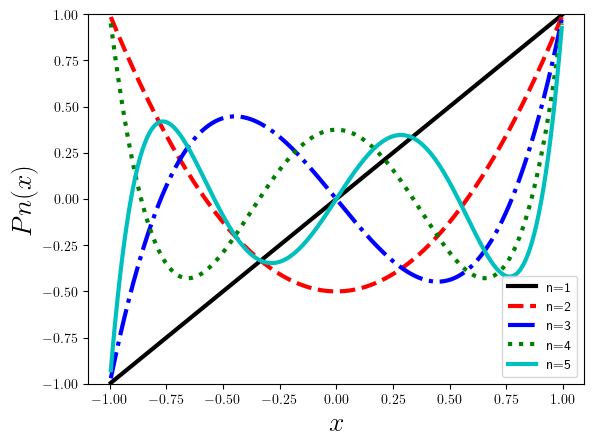

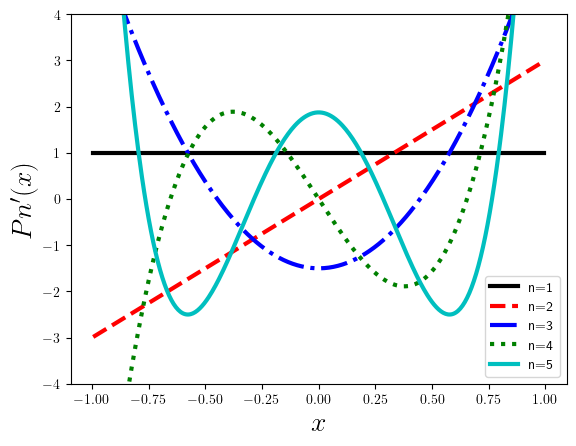

In [24]:
def legendre(n,x):
    if n==0:
        val2 = 1.
        dval2 = 0.
    elif n==1:
        val2 = x
        dval2 = 1.
    else:
        val0 = 1.; val1 = x 
        for j in range(1,n):
            val2 = ((2*j+1)*x*val1 - j*val0)/(j+1)
            val0, val1 = val1, val2 
            dval2 = n*(val0-x*val1)/(1.-x**2)
    return val2, dval2


def plotlegendre(der,nsteps): 
    plt.xlabel("$x$", fontsize=20)
    
    dertostr = {0: "$P n(x)$", 1: "$P n’(x)$"} 
    plt.ylabel(dertostr[der], fontsize=20)
    
    ntomarker = {1: "k-", 2: "r--", 3: "b-.", 4: "g:", 5: "c"} 
    xs = [i/nsteps for i in range(-nsteps+1,nsteps)]
    for n,marker in ntomarker.items():
        ys = [legendre(n,x)[der] for x in xs]
        labstr = "n={0}".format(n)
        plt.plot(xs, ys, marker, label=labstr, linewidth=3)
        
    plt.ylim(-3*der-1, 3*der+1) 
    plt.legend(loc=4) 
    plt.show()
    
    
#if __name__ == " __main__ ": 
nsteps = 200
plotlegendre(0,nsteps)
plotlegendre(1,nsteps)


In [83]:
def decomp(rs,ris):
    rmag = vecmag(rs); rimag = vecmag(ris) 
    prs = [r*ri for r,ri in zip(rs,ris)] 
    vecdot = kahansum(prs)
    costheta = vecdot/(rmag*rimag)
    return rmag, rimag, costheta


def multicoes(rs,qtopos,nmax=35):
    coes = [0. for n in range(nmax+1)] 
    for n in range(nmax+1):
        for q,pos in qtopos.items():
            rmag, rimag, costheta = decomp(rs,pos)
            val = q*(rimag**n)*legendre(n,costheta)[0] 
            coes[n] += val
    return coes


def multifullpot(rs,qtopos):
    coes = multicoes(rs,qtopos)
    rmag = vecmag(rs)
    contribs = [coe/rmag**(n+1) for n,coe in enumerate(coes)] 
    return kahansum(contribs)


#if __name__ =="main": 
qtopos = chargearray(6) 
for y in 1,-1:
    rs = [0.,y]
    potval = multifullpot(rs,qtopos); print(rs, potval)
        

[0.0, 1] 14.648455336422312
[0.0, -1] -0.6582727929806327


Los valores obtenidos en el programa que solo suma las contribuciones de cada carga son:

[0.0, 1] 14.648439740503107

[0.0, -1] -0.6582579911707249

Vemos que con nmax=35 el error relativo entre ambos programas es de 1e-6

**Problema 2.27**

In quantum field theory, a physically rich toy model is that of the partition function in the zero-dimensional scalar self-interacting case:

$$Z(g)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}dxe^{-x^2/2-gx^4/4!}$$

We haven’t seen how to numerically evaluate integrals yet (that will have to wait until chapter 7), so we evaluate this integral analytically to give:

$$Z(g)=\sqrt{\frac{3}{2\pi g}}e^{3/4g}K_{1/4}\left(\frac{3}{4g}\right)$$

where $K_{\nu}(z)$ is the modified Bessel function of the second kind (of real order $\nu$), whose values can be computed via scipy.special.kv().

(a) Expand the $e^{gx^4/4!}$ term in Eq. (2.130), under the assumption $|g|\ll 1$ and interchange the order of the integration and the summation, and then use a standard identity for the resulting Gaussian-like integral. Your final result should be:

$$\mathcal{A}(g)=\sum_{m=0}^{\infty}c_m g^m \text{,  } c_m=\left( -\frac{1}{4!}\right)^m \frac{(4m)!}{4^m(2m)!m!} $$

Note that Z(g) is convergent for g > 0 and divergent for g < 0; as a result, the series expansion in Eq. (2.132) has zero radius of convergence. In other words, our perturbative expansion is divergent; it can still be useful, however, since it is an asymptotic expansion. Behind all the complexity buried in the $c_m’s$, the main point is that they grow factorially; also important is the fact that they have alter- nating signs, similarly to what we encountered in section 2.4.4 when computing the exponential function for negative arguments.

(b) Call the partial sum for $\mathcal{A(g)}$ (summing from 0 up to and including $n)$ $\mathcal{A_n(g)}$. Plot $\mathcal{A}_n(g)$ vs $g$ (from 0.01 to 0.45), for $n$ = 5 and $n$ = 10; also show the exact answer from Eq. (2.131). Do you understand which n is doing a better job?

(c) Pick $g$ = 0.1 and plot the difference between $\mathcal{A}_n(g)$ and the exact answer from Eq. (2.131), this time vs $n$ (i.e., |An(g) − Z(g)| vs n). The idea behind optimal truncation is to truncate right before you reach the smallest term, i.e., to pick the n that this plot tells you will be the best. Figure out the appropriate range of $n’$s and how to present the results visually. Then, produce a new plot for g = 0.3.

(d) We now introduce the Borel transform of the series in Eq. (2.132):

$$\mathcal{B_A}(g)=\sum_{m=0}^{\infty}\frac{c_mg^m}{m!}$$

which divides every term in the expansion $\mathcal{A}(g)$ by $m!$. Remarkably, in many cases this produces a convergent series (i.e., with finite radius of convergence). Take $g$ = 0.1 and plot the difference between the partial sums corresponding to $\mathcal{B_A}(g)$ (for $n$ = 1,2,...,20), on the one hand, and the exact answer from Eq. (2.131), on the other, vs $n$ (i.e., |BA,n(g) − Z(g)| vs $n$). Add new sets of points for $g$ = 0.3, 1.4, 1.6 and interpret your results in terms of series convergence.

(e)  In the last plot, it’s a little difficult to say what’s going on for g = 1.4 and (especially) for g = 1.6. This results from using a small maximum n: employing floats, you will soon run into overflow issues if you try to make n much larger. Write a new function that employs NumPy’s long doubles to compute the partial sum corresponding to BA(g) up to n = 150.45 Motivated by problem 2.15, you could also sum the terms in reverse. Plot the results for g = 1.4 and g = 1.6 to determine what’s going on.

(f) While it is intriguing that BA(g) is sometimes a convergent expansion,the match between the Borel-transform partial sums and the exact answer is not always great. Also, you may be thinking that it was arbitrary to divide by the factorial in Eq. (2.133). Both these concerns can be addressed by defining the Borel sum:

$$B(g)=\int_0^{\infty} e^{-t}\mathcal{B_A}(tg)dt$$

Take $t\rightarrow t/g$, interchange the order of the summation and integration, and use $m!=\int_0^{\infty}e^{-t}t^mdt$,to show that asymptotically the behavior of $B(g)$is the same as that of A(g). We now have a formulation with the same asymptotics, but B(g) is an analytic function at g = 0, so we can reconstruct the exact non-perturbative answer, Z(g).46 To summarize, we can take a divergent perturbative series, carry out a Borel transform, proceed to the Borel sum, and thereby recover the true integral whose behavior the divergent series was meant to capture.

*Solución*

***Inciso a***

Escribimos la función $\mathcal{A}(g)$ en python:

In [3]:
g=sym.Symbol("g") #Definimos a g como una variable simbolica
def Ag(m):
    suma=0
    for i in range (0,m+1,1):
        suma+=(pow(-1/factorial(4),i)*(factorial(4*i)/(4**i*factorial(2*i)*factorial(i))))*g**i
    return suma

Ag(3)

                     3                       2                
- 0.125325520833333⋅g  + 0.0911458333333333⋅g  - 0.125⋅g + 1.0

***Inciso (b)***

Nos pide graficar para valores específicos:

In [4]:
#Ahora definimos la función que toma los dos parámetros para la gráfica
def AG(m,g):
    suma=0
    for i in range (0,m+1,1):
        suma+=(pow(-1/factorial(4),i)*(factorial(4*i)/(4**i*factorial(2*i)*factorial(i))))*g**i
    return suma


In [200]:
AG(2,1)

0.09114583333333333

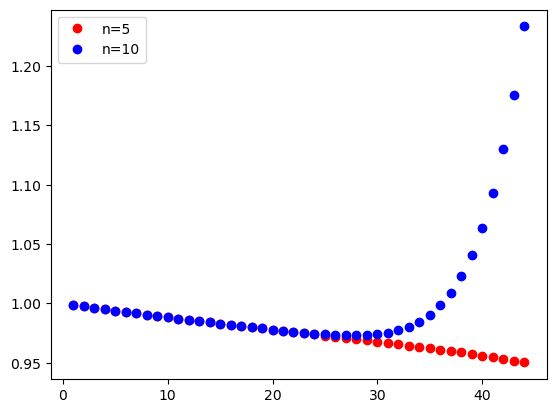

In [24]:
g=range(1,45,1)
plt.plot(g,[AG(5,i/100) for i in g],"ro", label="n=5")
plt.plot(g,[AG(10,i/100) for i in g],"bo",label="n=10")
plt.legend()
plt.show()

In [7]:
#Definimos la función Z

def Zg(g):
    Zg=np.sqrt(3/(2*np.pi*g))*np.exp(3/(4*g))*kv(0.25,3/(4*g))
    return Zg

In [8]:
Zg(0.01)

0.9987589917371759

Vemos que cuando m=10 el valor dado es igual al que se obtiene directamente de la ecuación 2.131, es decir, entre mayor m la aproximación es mejor.

***Inciso (c)***

Nos pide elegir un valor arbitrario de g=0.1

Primero vemos los valores que obtenemos con g=0.1 usando la función $\mathcal{A}(g)$ y la función Zg:

In [9]:
print(AG(1,1))
print(Zg(0.1))

0.875
0.9883063981483542


Vemos que para obtener una mejor aproximación n debe ser mayor que en el caso anterior del valor de g.

In [10]:
def dif(n,g):
    dif=AG(n,g)-Zg(g)
    return dif

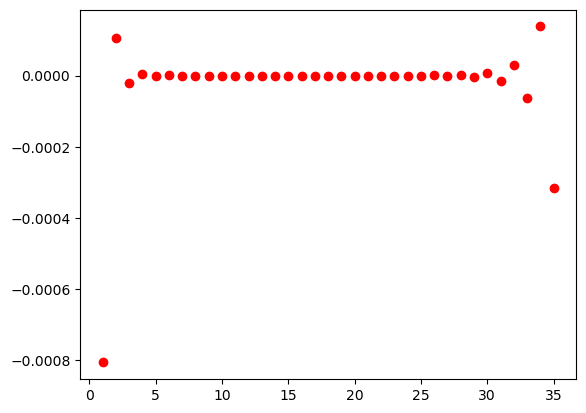

In [11]:
n=range(1,36,1)
plt.plot(n,[dif(i,1/10) for i in n],"ro")
plt.show()

Haciendo varias pruebas, el valor maximo para n en el que mantiene una diferencia de alrededor de 0 es en cuando n es aproximadamente 30 0 31, después la diferencia va aumentando o diverge y no se puede calcular ya la diferencia, también cuando n es menor de 5 se obtiene una diferencia mayor que en el rango entre 5 y 30.

Para cuando g=0.3 se obtiene la gráfica:

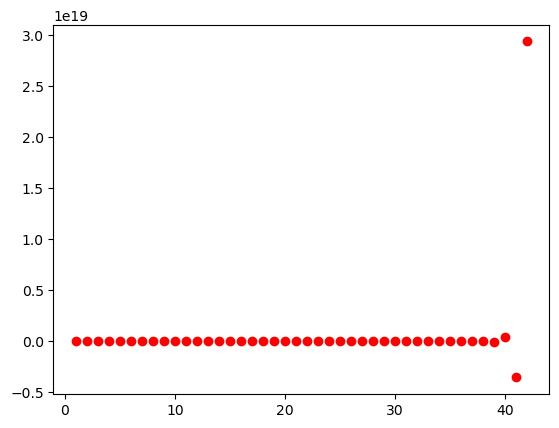

In [12]:
n=range(1,44,1)
plt.plot(n,[dif(i,3/10) for i in n],"ro")
plt.show()

Vemos que al igual que en el caso anterior, cuando llega a 44 diverge, pero a diferencia del caso anterior la diferencia es aún menor y n toma valores más grandes, cercanos a 40.

***Inciso (d)***

Nos pide definir una nueva función:

In [13]:
#Definimos la función BG que simplemente es dividir AG entre un factorial
def Bg(m,g):
    suma=0
    for i in range (0,m+1,1):
        suma+=((pow(-1/factorial(4),i)*(factorial(4*i)/(4**i*factorial(2*i)*factorial(i))))*g**i)/(factorial(i))
    return suma


In [15]:
print(Bg(2,0.1))

print(Zg(0.1))

0.9879557291666667
0.9883063981483542


In [14]:
def dif2(m,g):
    dif2=Bg(m,g)-Zg(g)
    return dif2

In [16]:
dif2(2,0.1)

-0.000350668981687452

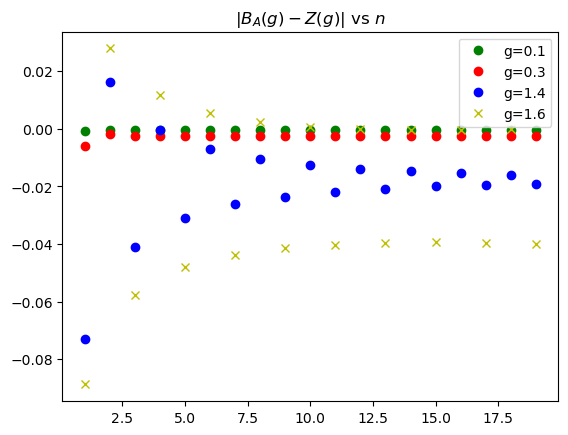

In [33]:
#Graficamos la función de la diferencia entre Bg y Zg
n=range(1,20,1)
plt.plot(n,[dif2(i,0.1) for i in n],"go",label="g=0.1")
plt.plot(n,[dif2(i,0.3) for i in n],"ro",label="g=0.3")
plt.plot(n,[dif2(i,1.4) for i in n],"bo",label="g=1.4")
plt.plot(n,[dif2(i,1.6) for i in n],"yx",label="g=1.6")
plt.title("$|B_{A}(g)-Z(g)|$ vs $n$")
plt.legend()
plt.show()

Vemos que cuando g es menor que 1 el comportamiento de la diferencia entre la aproximación y la función Z es constante, pero cuando es mayor que 1 la diferencia diverge, se puede deber a la convergencia de la función B que está en términos de series de potencias.

***Inciso (e)***

En este inciso nos piden evaluar la función para un número n mucho más grande, n=150


In [79]:
def Bg(m,g):
    suma=0
    for i in range (m,0,-1):
        suma+=np.longdouble(((pow(-1/factorial(4),i)*(factorial(4*i)/(4**i*factorial(2*i)*factorial(i))))*g**i)/(factorial(i)))
    return suma

(Bg(43,1.4))

-inf

In [72]:
np.finfo(np.longdouble)

finfo(resolution=1.0000000000000000715e-18, min=-1.189731495357231765e+4932, max=1.189731495357231765e+4932, dtype=float128)